# 결정트리

## 결정 트리 모델의 시각화

In [1]:
!pip install graphviz

In [2]:
import graphviz

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붗꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함

# export_graphviz()에 인자로 학습이 완료된 estimator, output 파일 명, 결정 클래스의 명칭 피처의 명칭
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)

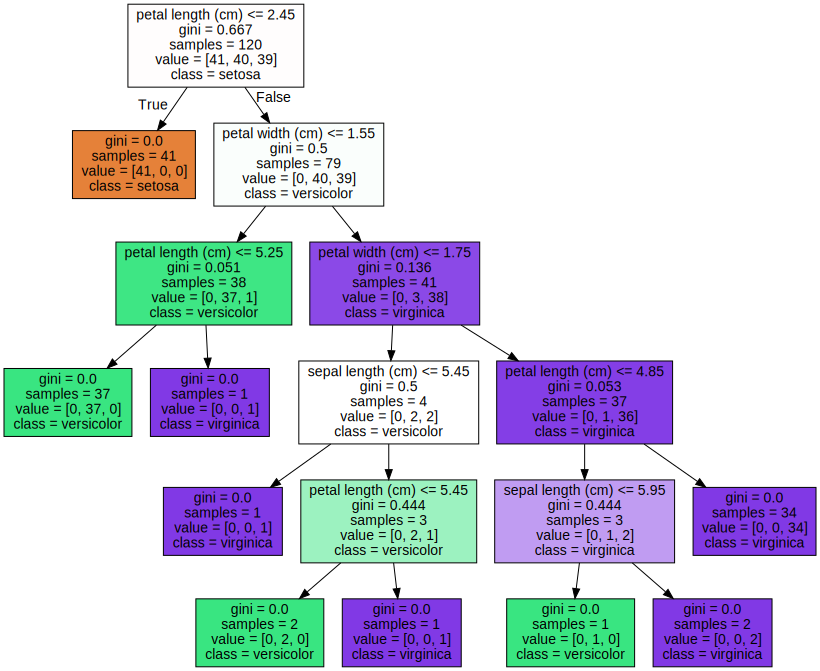

In [5]:
#시각적 표현

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽음
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


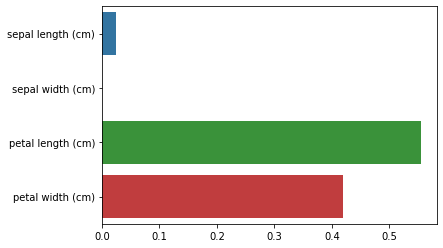

In [6]:
# 피처별로 중요한 속성을 가져와 피처별로 중요도 값을 매핑하고 이를 막대그래프로 표현
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))
# name과 value에는 feature_names과 feature_importances_가 들어간다.

# feature importance를 column별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

# 여러 피처들중 petal_length가 가장 피처 중요도가 높음을 알 수 있다.

## 결정 트리의 과적함(Overfitting)

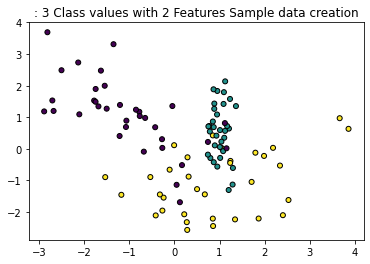

In [7]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline 

plt.title(": 3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_classes = 3, n_clusters_per_class = 1, random_state = 0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, edgecolor = 'k')

In [8]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

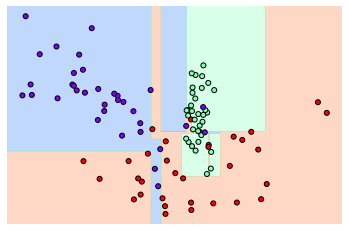

In [9]:
# X_features와 y_labels 데이터 세트를 기반으로 결정트리를 학습하겠다. 첫번째 학습시에는 결정 트리 생성에 별다른 제약이 없도록 결정트리의
# 하이퍼 파라미터를 디폴트로 한뒤, 결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인할 것임.
# 이를 위해 별도의 함수인 visualize_boundary()를 생성함. 해당 함수는 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게
# 데이터 세트를 예측 분류하는지 잘 이해할 수 있게 해준다. 그래서 특성을 이해할 수 있게 한다. 
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌다. 결정 트리의 기본 하이퍼 파라미터 설정은
# 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡해졌다. 이렇게 복잡한 모델은 학습데이터
# 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어지게 된다.

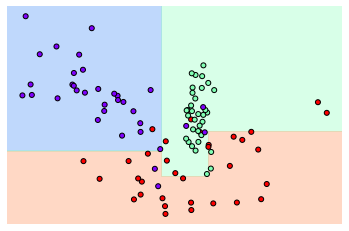

In [10]:
# 이번에는 min_samples_leaf = 6으로 설정해 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완하한 뒤 하이퍼 파라미터를 변경해
# 어떻게 결정 기준 경계가 변하는지 살펴보겠다.

# min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 위에꺼 보다 더 뛰어난 모델이 됨.

## 결정 트리 실습 - 사용자 행동 인식 데이터 세트
- 해당 데이터는 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터이다. 수집된 피처 데이터를 기반으로 결정 트리를 이용해 어떠한 동작인지 예측해 보겠다.
링크 : http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+SmartPhones

In [27]:
import os

os.chdir("/content/drive/MyDrive/data")
print(os.getcwd())

/content/drive/MyDrive/data


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header = None, names = ['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print("전체 피처명에서 10개만 추출: ",feature_name[:10])

# 속성의 평균/표준편차가 X,Y,Z축 값으로 돼 있음을 유추할 수 있음

전체 피처명에서 10개만 추출:  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [43]:
# 중복된 피처명 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())  
feature_dup_df[feature_dup_df['column_index'] > 1].head() 

# 42개의 피처명이 중복되어 있음

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [46]:
# 중복된 피처명에 _1 또는 _2를 추가부여해 새로운 피처명을 가지는 DataFrame을 반환하는 함수인 
# get_new_feature_name_df()를 생성

def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'-'+str(x[1]) if x[1]>0 else x[0],
                                                                                             axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
  return new_feature_name_df

In [49]:
# 이제 train디렉터리에 있는 학습용 데이터 세트와 레이블 데이터 세트, test디렉터리에 있는 테스트용 피처 데이터 파일과 레이블 데이터
# 파일을 각각 학습/테스트용 DataFrame에 로드하겟다. 

import pandas as pd
def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
  feature_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()이용, 신규 피처명 DataFrame생성 
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name적용
  X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names = feature_name)
  X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names = feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header = None, names = ['action'])
  y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header = None, names = ['action'])

  # 로드된 학습/테스트용 Dataframe을 모두 반환 
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [54]:
# 로드한 학습용 피처 데이터 세트를 간략히 살펴보겠다.
print('## 학습 피처 데이터 셋 info()')
print(X_train.info())


## 학습 피처 데이터 셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [56]:
# 학습데이터 세트는 7352개의 레코드로 561개의 피처를 가지고 있다. 피처가 전부 float형의 숫자형 이므로 별도의 카테고리 인코딩은
# 필요하지 않다. 
print(y_train['action'].value_counts())

# 레이블 값은 1~6의 6개 값이고 분포도는 비교적 고르게 분포됨

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [59]:
# 결정트리를 이용해 예측 분류를 수행해보겠다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정트리의 예측 정확도: {0:.4f}'.format(accuracy))

# 이 결정 트리의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터\n', dt_clf.get_params())

결정트리의 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [60]:
# 이번에는 결정 트리의 트리 깊이가 예측 정확도에 주는 영향을 살펴보겠다.
# GridSearchCV를 이용해 사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 max_depth값을 변화시키면서 예측 성능 확인
# 교차검증은 5개 세트, 즉 5개의 CV세트로 7개 max_depth를 테스트)

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [ 6, 8, 10, 12, 16, 20 , 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('그리드 서치CV의 최고 평균 정확도 수치{0:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파마리터:', grid_cv.best_params_)

# max_depth가 16일때 5개의 폴드 세트의 최고 평균 정확도 결과가 85.26%로 도출됨

Fitting 5 folds for each of 7 candidates, totalling 35 fits
그리드 서치CV의 최고 평균 정확도 수치0.8513
최적 하이퍼 파마리터: {'max_depth': 16}


In [62]:
# 5개의 cv세트에서 max_depth값에 따라 예측 성능이 어떻게 변했는지 GridSearchCV 객체의 cv_results_ 속성을
# 살펴보겠다.

# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

# mean_test_score는 5개 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치이다.
# 깊어진 트리는 학습데이터 세트에는 올바른 예측 결과를 가져오지만, 검증 데이터 세트에서는 오히려 과적합으로 인한
# 성능 저하를 유발하게 된다.

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [65]:
# 이번에는 별도의 테스트 데이터 세트에서 결정 트리의 정확도를 측정해보겠다. 앞에서 GridSearchCV의 예제에서는
# max_depth가 8일때 가장 좋은 성능을 나타냈다. 별도의 테스트 데이터 세트에서 max_depth의 변화에 따른 값을 측정해보겠다.
max_depth=[6, 8, 10, 12, 16, 20 , 24]

# max_depth값을 변하 시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depth:
  dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

# max_depth가 8일때 가장 높은 정확도를 나타냈다. max_depth 8이 넘어서면 계속해서 감소하는 경향을 보인다.
# 이처럼 결정 트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어할 수 있어야 한다.
# 복잡한 모델보다도 트리 깊이를 낮춘 단순한 모델이 더욱 효과적인 결과를 가져올 수 있다.

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [68]:
# max_depth와 min_samples_split을 같이 변경하면서 정확도 성능을 튜닝해보겠다.
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv= 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('그리드 서치CV의 최고 평균 정확도 수치{0:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파마리터:', grid_cv.best_params_)

# max_depth 8, in_samples_split 16일때 가장 최고의 정확도로 약 85.5%이다.

Fitting 5 folds for each of 8 candidates, totalling 40 fits
그리드 서치CV의 최고 평균 정확도 수치0.8549
최적 하이퍼 파마리터: {'max_depth': 8, 'min_samples_split': 16}


In [72]:
# 별도의 분리된 테스트 데이터 세트에 해당 하이퍼 파라미터를 적용해 보겠다. 앞 예제의 GridSearchCV객체인 
# grid_cv의 속성인 best_estimator_는 최적 하이퍼 파라미터인 max_depth 8, min_samples_split 16으로 학습이 완료된
# Estimator객체이다. 이를 이용해 테스트 데이터 세트에 예측을 수행하겠다.

best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

# 멕스뎁 8, 민셈플스플릿 16일때 테스트 데이터 세트의 예측 정확도는 약 87.17%이다.

결정 트리 예측 정확도:0.8717


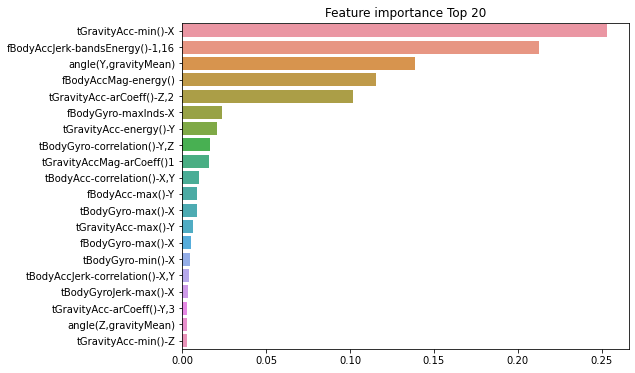

In [73]:
# 마지막으로 결정 트리에서 각 피처의 중요도를 feature_importances_ 속성을 이용해 알아보겠다.
# 중요도가 높은 순으로 top20 피처를 막대그래프로 표현

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top중요도로 정렬을 쉽게하고, 시본의 막대그래프로 쉽게 표현하기 위해 series변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8, 6))
plt.title('Feature importance Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()